In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_model = pd.read_csv('match_data_bl_wo_nan_s_2022.csv')
data_betting = pd.read_csv('dataframe_with_odd_predictions_v2.csv')
data_betting.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Betting_Prediction,Betting_Prediction_Probability
0,0,0,0,D1,11/08/06,Bayern Munich,Dortmund,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,65.423011
1,1,1,1,D1,12/08/06,Hamburg,Bielefeld,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,71.593915
2,2,2,2,D1,12/08/06,Leverkusen,Aachen,3,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,68.510536
3,3,3,3,D1,12/08/06,Mainz,Bochum,2,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,51.671408
4,4,4,4,D1,12/08/06,M'gladbach,Cottbus,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,63.117820


In [4]:
data_model_reduced = data_model[['FTR', 'predictedResults', 'ProbAwayWin',
                                'ProbDraw', 'ProbHomeWin']]
data_model_reduced

,FTR,predictedResults,ProbAwayWin,ProbDraw,ProbHomeWin
0,1,0,0.503778,0.210859,0.285363
1,2,2,0.015976,0.036361,0.947663
2,2,0,0.860361,0.039739,0.099900
3,0,2,0.224459,0.236729,0.538812
4,2,2,0.152851,0.198737,0.648412
...,...,...,...,...,...
211,1,2,0.249225,0.287064,0.463711
212,2,2,0.163723,0.206911,0.629366
213,2,2,0.219194,0.367019,0.413787
214,2,2,0.273001,0.269522,0.457477


In [5]:
data_betting_reduced = data_betting[['Betting_Prediction', 'Betting_Prediction_Probability']]


In [17]:
def convert_ftr(result: str):
    if result == "D":
        return 1
    elif result == "H":
        return 2
    elif result == "A":
        return 0
    else:
        return None
# data_betting_reduced['Betting_Prediction'] = data_betting_reduced['Betting_Prediction'].apply(convert_ftr)

In [7]:
data_betting_reduced = data_betting_reduced[-216:].reset_index()
data_betting_reduced

,index,Betting_Prediction,Betting_Prediction_Probability
0,4680,0,39.027149
1,4681,2,84.957521
2,4682,0,51.966635
3,4683,2,53.713640
4,4684,2,65.686275
...,...,...,...
211,4891,2,59.797517
212,4892,2,49.390244
213,4893,2,45.983087
214,4894,2,71.301925


In [19]:
def get_odd_prediction(data_model_reduced):
    erg_prob = []
    z = 0
    while z < len(data_model_reduced):
        if data_model_reduced['predictedResults'][z] == 0:
            erg_prob.append(data_model_reduced['ProbAwayWin'][z])
        if data_model_reduced['predictedResults'][z] == 1:
            erg_prob.append(data_model_reduced['ProbDraw'][z])
        if data_model_reduced['predictedResults'][z] == 2:
            erg_prob.append(data_model_reduced['ProbHomeWin'][z])
        z+=1
    return erg_prob


# max_prob_model = get_odd_prediction(data_model_reduced)
# data_model_reduced['Model_Prediction_Probability'] = max_prob_model

In [9]:
data_evaluation = data_model_reduced[[
    'FTR', 'predictedResults', 'Model_Prediction_Probability'
]].merge(data_betting_reduced[[
    'Betting_Prediction', 'Betting_Prediction_Probability'
]],
         how='inner',
         left_index=True,
         right_index=True)
data_evaluation

,FTR,predictedResults,Model_Prediction_Probability,Betting_Prediction,Betting_Prediction_Probability
0,1,0,0.503778,0,39.027149
1,2,2,0.947663,2,84.957521
2,2,0,0.860361,0,51.966635
3,0,2,0.538812,2,53.713640
4,2,2,0.648412,2,65.686275
...,...,...,...,...,...
211,1,2,0.463711,2,59.797517
212,2,2,0.629366,2,49.390244
213,2,2,0.413787,2,45.983087
214,2,2,0.457477,2,71.301925


In [10]:
def get_evaluation_score(data_evaluation):
    right_model, right_odds, right_home = 0, 0, 0
    right_model_list, right_odds_list, right_home_list = [], [], []
    z = 0
    while z < len(data_evaluation):
        if data_evaluation['FTR'][z] == data_evaluation['predictedResults'][z]:
            right_model +=1
        if data_evaluation['FTR'][z] == data_evaluation['Betting_Prediction'][
                z]:
            right_odds +=1
        if data_evaluation['FTR'][z] == 2:
            right_home +=1
        right_model_list.append(right_model)
        right_odds_list.append(right_odds)
        right_home_list.append(right_home)
        z += 1

    return right_model, right_odds, right_home, right_model_list, right_odds_list, right_home_list


right_model, right_odds, right_home, right_model_list, right_odds_list, right_home_list = get_evaluation_score(
    data_evaluation)


In [11]:
print('Accuracy Model: ', right_model / len(data_evaluation))
print('Accuracy Odds: ', right_odds / len(data_evaluation))
print('Accuracy Home: ', right_home / len(data_evaluation))

Accuracy Model:  0.4722222222222222
Accuracy Odds:  0.5046296296296297
Accuracy Home:  0.4583333333333333


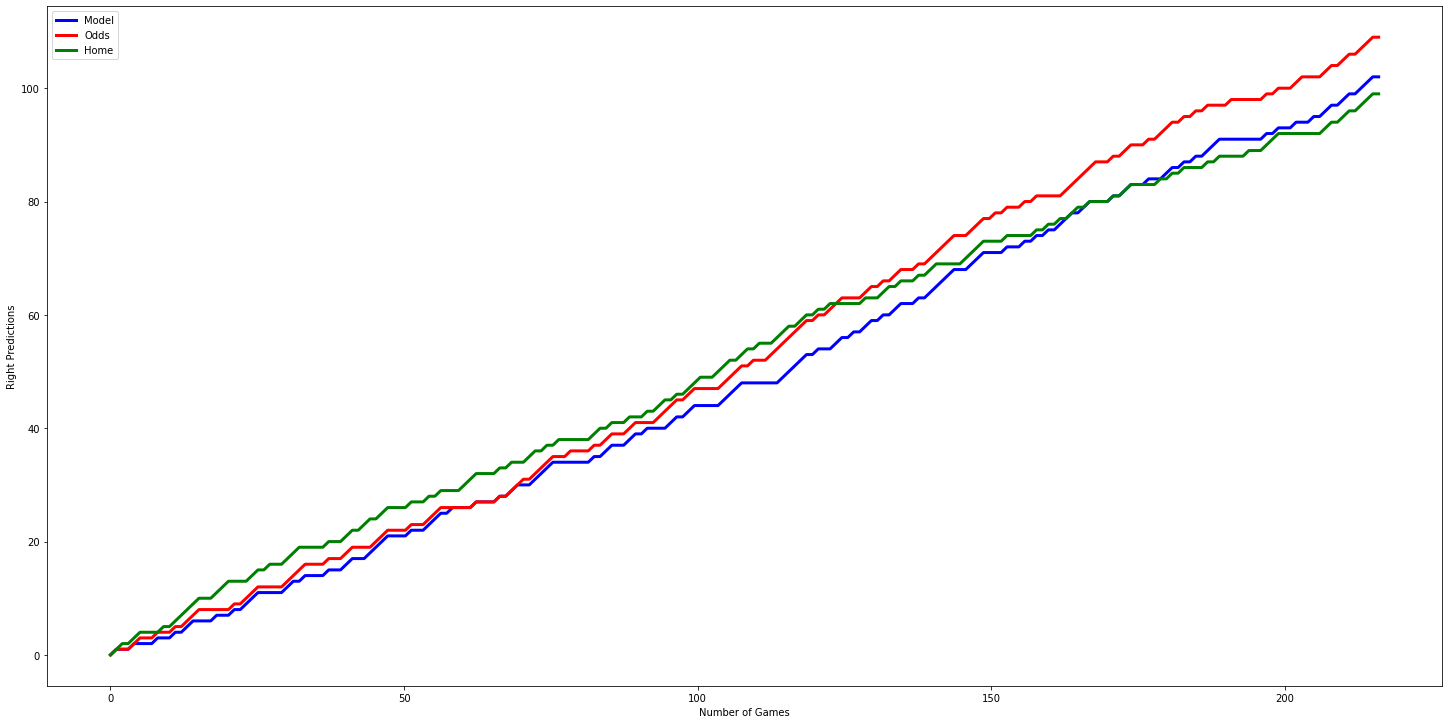

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 216, 216)
y1 = right_model_list
y2 = right_odds_list
y3 = right_home_list



plt.figure(num=3, figsize=(25, 12.5))
plt.plot(x, y1, color='blue', linewidth=3.0, label='Model')
plt.plot(x, y2, color='red', linewidth=3.0, label='Odds')
plt.plot(x, y3, color='green', linewidth=3.0, label='Home')

plt.xlabel("Number of Games")
plt.ylabel("Right Predictions")

plt.legend()
plt.show()

In [13]:
def prob_to_odds(data_evaluation):
    z, model_odds, betting_odds = 0, 0, 0
    model_odds_list, betting_odds_list = [], []
    while z < len(data_evaluation):
        model_odds = 1 / ((data_evaluation['Model_Prediction_Probability'][z]*100) / 100)
        model_odds_list.append(model_odds)

        betting_odds = 1 / ((data_evaluation['Betting_Prediction_Probability'][z]) / 100)
        betting_odds_list.append(betting_odds)
        z+=1
    data_evaluation['Model_Odds'] = model_odds_list
    data_evaluation['Betting_Odds'] = betting_odds_list


prob_to_odds(data_evaluation)

In [14]:
data_evaluation.head()

,FTR,predictedResults,Model_Prediction_Probability,Betting_Prediction,Betting_Prediction_Probability,Model_Odds,Betting_Odds
0,1,0,0.503778,0,39.027149,1.985001,2.562319
1,2,2,0.947663,2,84.957521,1.055228,1.177059
2,2,0,0.860361,0,51.966635,1.162303,1.924312
3,0,2,0.538812,2,53.713640,1.855934,1.861725
4,2,2,0.648412,2,65.686275,1.542229,1.522388


In [15]:
def betting_with_the_model(data_evaluation):
    z, model_bank = 0, 1000
    bank_model_list = []
    while z < len(data_evaluation):
        if data_evaluation['Model_Prediction_Probability'][z]*100 <= 40:
            model_bank = model_bank
            if data_evaluation['predictedResults'][z] == data_evaluation['FTR'][z]:
                model_bank = model_bank
                # model_bank = model_bank + 2 * data_evaluation['Model_Odds'][z]
        elif data_evaluation['Model_Prediction_Probability'][z] * 100 <= 70:
            model_bank = model_bank
            if data_evaluation['predictedResults'][z] == data_evaluation[
                    'FTR'][z]:
                model_bank = model_bank
                # model_bank = model_bank + 5 * data_evaluation['Model_Odds'][z]
        elif data_evaluation['Model_Prediction_Probability'][z] * 100 <= 80:
            model_bank = model_bank - 7
            if data_evaluation['predictedResults'][z] == data_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 7 * data_evaluation['Model_Odds'][z]
        elif data_evaluation['Model_Prediction_Probability'][z] * 100 > 80:
            model_bank = model_bank - 10
            if data_evaluation['predictedResults'][z] == data_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 10 * data_evaluation['Model_Odds'][z]
        else:
            print('Fehler!')
        bank_model_list.append(model_bank)
        z += 1
    return bank_model_list


bank_model_list = betting_with_the_model(data_evaluation)
bank_model_list

[1000,
 1000.5522762774182,
 990.5522762774182,
 990.5522762774182,
 990.5522762774182,
 990.5522762774182,
 990.5522762774182,
 990.5522762774182,
 991.2532817000135,
 981.2532817000135,
 974.2532817000135,
 975.7880129951029,
 975.7880129951029,
 978.3363590401493,
 980.9745536080353,
 980.9745536080353,
 980.9745536080353,
 980.9745536080353,
 980.9745536080353,
 970.9745536080353,
 970.9745536080353,
 971.6826484372955,
 971.6826484372955,
 971.6826484372955,
 971.9367754414261,
 971.9367754414261,
 971.9367754414261,
 971.9367754414261,
 971.9367754414261,
 964.9367754414261,
 964.9367754414261,
 966.27460060189,
 966.27460060189,
 966.27460060189,
 966.27460060189,
 966.27460060189,
 966.27460060189,
 966.7441921443865,
 956.7441921443865,
 956.7441921443865,
 956.7441921443865,
 956.7441921443865,
 956.7441921443865,
 946.7441921443865,
 946.7441921443865,
 948.6899436199556,
 948.6899436199556,
 948.6899436199556,
 948.6899436199556,
 948.6899436199556,
 948.6899436199556,
 949

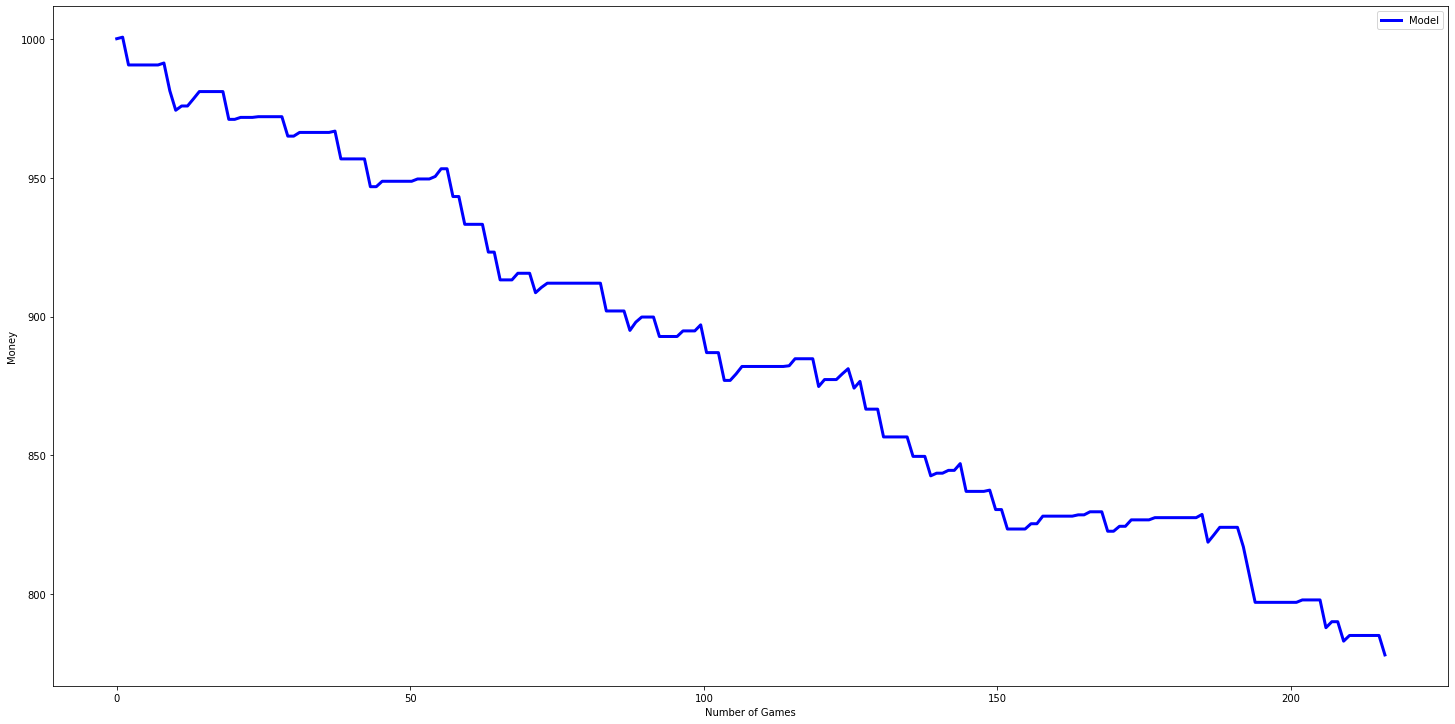

In [16]:
x = np.linspace(0, 216, 216)
y1 = bank_model_list

plt.figure(num=3, figsize=(25, 12.5))
plt.plot(x, y1, color='blue', linewidth=3.0, label='Model')

plt.xlabel("Number of Games")
plt.ylabel("Money")

plt.legend()
plt.show()

In [17]:
def betting_with_the_odds(data_evaluation):
    z, odds_bank = 0, 1000
    bank_odds_list = []
    while z < len(data_evaluation):
        if data_evaluation['Betting_Prediction_Probability'][z] * 100 <= 40:
            odds_bank = odds_bank
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank
                # odds_bank = odds_bank + 2 * data_evaluation['Betting_Odds'][z]
        elif data_evaluation['Betting_Prediction_Probability'][z] * 100 <= 70:
            odds_bank = odds_bank
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank
                # odds_bank = odds_bank + 5 * data_evaluation['Betting_Odds'][z]
        elif data_evaluation['Betting_Prediction_Probability'][z] * 100 <= 80:
            odds_bank = odds_bank - 7
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 7 * data_evaluation['Betting_Odds'][z]
        elif data_evaluation['Betting_Prediction_Probability'][z] * 100 > 80:
            odds_bank = odds_bank - 10
            if data_evaluation['Betting_Prediction'][z] == data_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 10 * data_evaluation['Betting_Odds'][z]
        else:
            print('Fehler!')
        bank_odds_list.append(odds_bank)
        z += 1
    return bank_odds_list


bank_odds_list = betting_with_the_odds(data_evaluation)
bank_odds_list

[990,
 991.7705882352941,
 981.7705882352941,
 971.7705882352941,
 976.994468832309,
 986.366005520556,
 976.366005520556,
 966.366005520556,
 975.866005520556,
 965.866005520556,
 955.866005520556,
 959.3386435807139,
 949.3386435807139,
 953.161334482097,
 956.158668251266,
 966.1403699896009,
 956.1403699896009,
 946.1403699896009,
 936.1403699896009,
 926.1403699896009,
 916.1403699896009,
 922.4886795057695,
 912.4886795057695,
 926.2373110175312,
 927.0576005937038,
 940.1805952461102,
 930.1805952461102,
 920.1805952461102,
 910.1805952461102,
 900.1805952461102,
 909.0530784675867,
 911.4012566052386,
 926.3962556050385,
 934.5051814749326,
 924.5051814749326,
 914.5051814749326,
 904.5051814749326,
 906.7500794341162,
 896.7500794341162,
 886.7500794341162,
 896.812830994982,
 904.1839674606254,
 894.1839674606254,
 884.1839674606254,
 874.1839674606254,
 877.027616553784,
 890.1987111340178,
 899.5215282257253,
 889.5215282257253,
 879.5215282257253,
 869.5215282257253,
 870.

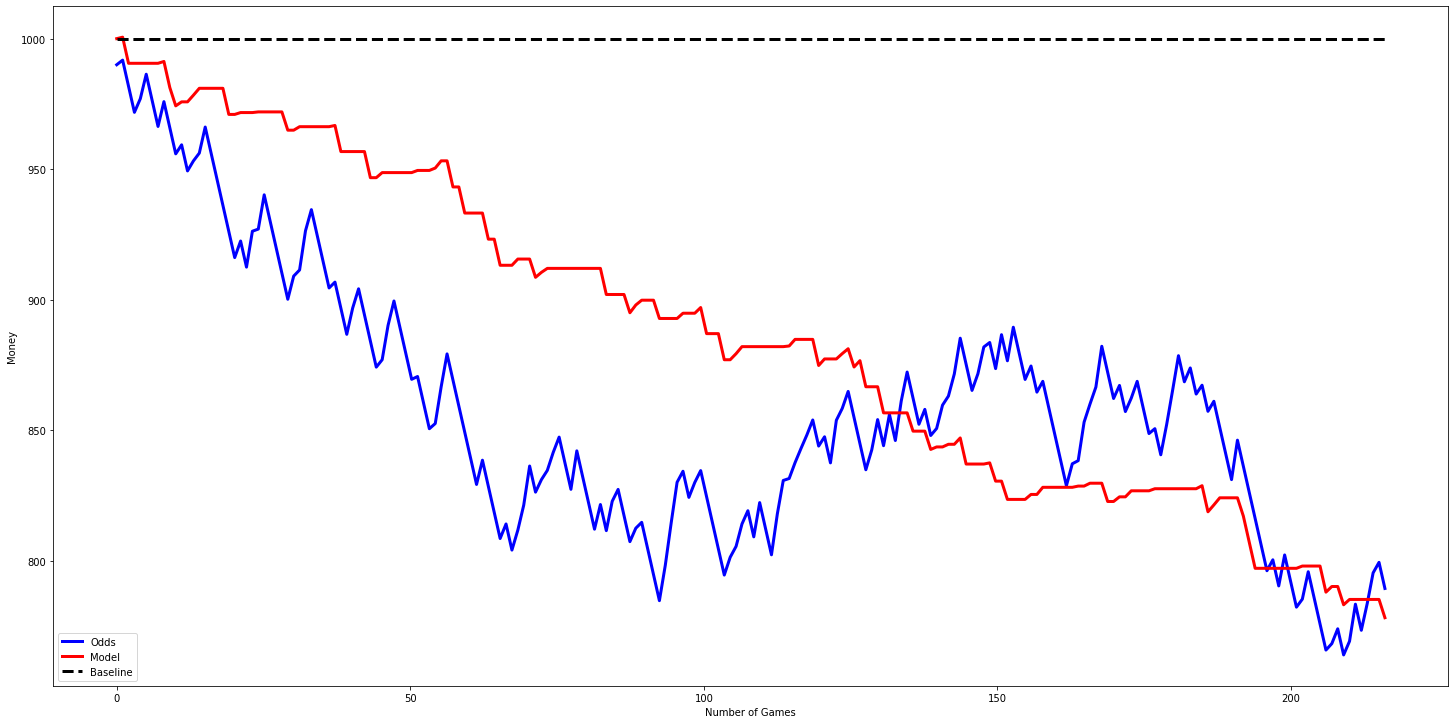

In [20]:
x = np.linspace(0, 216, 216)
y = np.linspace(1000, 1000, 216)
y1 = bank_odds_list
y2 = bank_model_list

plt.figure(num=3, figsize=(25, 12.5))
plt.plot(x, y1, color='blue', linewidth=3.0, label='Odds')
plt.plot(x, y2, color='red', linewidth=3.0, label='Model')
plt.plot(x, y, color='black', linewidth=3.0, label='Baseline', linestyle='--')

plt.xlabel("Number of Games")
plt.ylabel("Money")

plt.legend()
plt.show()

In [2]:
# function to load the data files with the model and the betting vendor precitions for the last season
def load_data(file1, file2):
    model_data = pd.read_csv('match_data_bl_wo_nan_s_2022.csv')
    betting_odds_data = pd.read_csv('dataframe_with_odd_predictions_v2.csv')
    return model_data, betting_odds_data

In [3]:
# function to only select the columns necessary for the comparison of our model and the betting vendors
# calling functions to harmonize the dataframes
def reduce_data(model_data, betting_odds_data):
    model_data_reduced = model_data[[
        'FTR', 'predictedResults', 'ProbAwayWin', 'ProbDraw', 'ProbHomeWin'
    ]]
    betting_odds_data_reduced = betting_odds_data[[
        'Betting_Prediction', 'Betting_Prediction_Probability'
    ]]
    betting_odds_data_reduced[
        'Betting_Prediction'] = betting_odds_data_reduced[
            'Betting_Prediction'].apply(convert_ftr)
    betting_odds_data_reduced = betting_odds_data_reduced[-216:].reset_index()
    return model_data_reduced, betting_odds_data_reduced


In [4]:
# function to get the probabilities for the result predicted from the model
def get_model_prediction_probability(model_data_reduced):
    result_probability = []
    z = 0
    while z < len(model_data_reduced):
        if model_data_reduced['predictedResults'][z] == 0:
            result_probability.append(model_data_reduced['ProbAwayWin'][z])
        if model_data_reduced['predictedResults'][z] == 1:
            result_probability.append(model_data_reduced['ProbDraw'][z])
        if model_data_reduced['predictedResults'][z] == 2:
            result_probability.append(model_data_reduced['ProbHomeWin'][z])
        z += 1
    return result_probability

In [5]:
# function to add the probabilities for the result predicted from the model to the dataframe
def add_model_probabilities(model_data_reduced):
    model_prediction_probability = get_odd_prediction(model_data_reduced)
    model_data_reduced[
        'Model_Prediction_Probability'] = model_prediction_probability
    return model_data_reduced


In [6]:
# function to merge the dataframes from the model and the betting odds
def merge_dataframes(model_data_reduced, betting_odds_data_reduced):
    data_for_evaluation = model_data_reduced[[
        'FTR', 'predictedResults', 'Model_Prediction_Probability'
    ]].merge(betting_odds_data_reduced[[
        'Betting_Prediction', 'Betting_Prediction_Probability'
    ]],
             how='inner',
             left_index=True,
             right_index=True)
    return data_for_evaluation

In [7]:
# function the get the number of the right picks from model, odds and only home team predictions
def get_evaluation_score(data_for_evaluation):
    right_model, right_odds, right_home = 0, 0, 0
    right_model_list, right_odds_list, right_home_list = [], [], []
    z = 0
    while z < len(data_for_evaluation):
        if data_for_evaluation['FTR'][z] == data_for_evaluation['predictedResults'][z]:
            right_model += 1
        if data_for_evaluation['FTR'][z] == data_for_evaluation[
                'Betting_Prediction'][z]:
            right_odds += 1
        if data_for_evaluation['FTR'][z] == 2:
            right_home += 1
        right_model_list.append(right_model)
        right_odds_list.append(right_odds)
        right_home_list.append(right_home)
        z += 1

    return right_model, right_odds, right_home, right_model_list, right_odds_list, right_home_list


In [8]:
# function to print the accuracy for model, betting odds and only home team predictions
def print_accuracys(right_model, right_odds, right_home, data_for_evaluation):
    print('Accuracy Model: ', right_model / len(data_for_evaluation))
    print('Accuracy Odds: ', right_odds / len(data_for_evaluation))
    print('Accuracy Home: ', right_home / len(data_for_evaluation))

In [9]:
#  function to plot the number of the right picks over the last season
def show_right_picks(right_model_list, right_odds_list, right_home_list):
    x = np.linspace(0, 216, 216)

    y1 = right_model_list
    y2 = right_odds_list
    y3 = right_home_list

    plt.figure(num=3, figsize=(25, 12.5))
    plt.plot(x, y1, color='blue', linewidth=3.0, label='Model')
    plt.plot(x, y2, color='red', linewidth=3.0, label='Odds')
    plt.plot(x, y3, color='green', linewidth=3.0, label='Home')

    plt.xlabel("Number of Games")
    plt.ylabel("Right Predictions")

    plt.legend()
    plt.show()

In [10]:
# function to transfer the result probabilities into betting odds
def probability_to_odds(data_for_evaluation):
    z, model_odds, betting_odds = 0, 0, 0
    model_odds_list, betting_odds_list = [], []
    while z < len(data_for_evaluation):
        model_odds = 1 / (
            (data_for_evaluation['Model_Prediction_Probability'][z] * 100) / 100)
        model_odds_list.append(model_odds)

        betting_odds = 1 / (
            (data_for_evaluation['Betting_Prediction_Probability'][z]) / 100)
        betting_odds_list.append(betting_odds)
        z += 1
    data_for_evaluation['Model_Odds'] = model_odds_list
    data_for_evaluation['Betting_Odds'] = betting_odds_list

In [24]:
# function to simulate betting with the model predcitions
def betting_with_the_model(data_for_evaluation):
    z, model_bank = 0, 1000
    bank_model_list = []
    while z < len(data_for_evaluation):
        if data_for_evaluation['Model_Prediction_Probability'][z] * 100 <= 40:
            model_bank = model_bank
            if data_for_evaluation['predictedResults'][z] == data_for_evaluation[
                    'FTR'][z]:
                model_bank = model_bank
                # model_bank = model_bank + 2 * data_evaluation['Model_Odds'][z]
        elif data_for_evaluation['Model_Prediction_Probability'][z] * 100 <= 70:
            model_bank = model_bank
            if data_for_evaluation['predictedResults'][z] == data_for_evaluation[
                    'FTR'][z]:
                model_bank = model_bank
                # model_bank = model_bank + 5 * data_evaluation['Model_Odds'][z]
        elif data_for_evaluation['Model_Prediction_Probability'][z] * 100 <= 80:
            model_bank = model_bank - 7
            if data_for_evaluation['predictedResults'][z] == data_for_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 7 * data_for_evaluation['Model_Odds'][z]
        elif data_for_evaluation['Model_Prediction_Probability'][z] * 100 > 80:
            model_bank = model_bank - 10
            if data_for_evaluation['predictedResults'][z] == data_for_evaluation[
                    'FTR'][z]:
                model_bank = model_bank + 10 * data_for_evaluation['Model_Odds'][z]
        else:
            print('Fehler!')
        bank_model_list.append(model_bank)
        z += 1
    return bank_model_list

In [23]:
# function to simulate betting with the betting odd predcitions
def betting_with_the_odds(data_for_evaluation):
    z, odds_bank = 0, 1000
    bank_odds_list = []
    while z < len(data_for_evaluation):
        if data_for_evaluation['Betting_Prediction_Probability'][z] * 100 <= 40:
            odds_bank = odds_bank
            if data_for_evaluation['Betting_Prediction'][z] == data_for_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank
                # odds_bank = odds_bank + 2 * data_evaluation['Betting_Odds'][z]
        elif data_for_evaluation['Betting_Prediction_Probability'][z] * 100 <= 70:
            odds_bank = odds_bank
            if data_for_evaluation['Betting_Prediction'][z] == data_for_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank
                # odds_bank = odds_bank + 5 * data_evaluation['Betting_Odds'][z]
        elif data_for_evaluation['Betting_Prediction_Probability'][z] * 100 <= 80:
            odds_bank = odds_bank - 7
            if data_for_evaluation['Betting_Prediction'][z] == data_for_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 7 * data_for_evaluation['Betting_Odds'][z]
        elif data_for_evaluation['Betting_Prediction_Probability'][z] * 100 > 80:
            odds_bank = odds_bank - 10
            if data_for_evaluation['Betting_Prediction'][z] == data_for_evaluation[
                    'FTR'][z]:
                odds_bank = odds_bank + 10 * data_for_evaluation['Betting_Odds'][z]
        else:
            print('Fehler!')
        bank_odds_list.append(odds_bank)
        z += 1
    return bank_odds_list

In [26]:
# function to show the bank balance while the betting simulations
def simulate_betting_profit(bank_odds_list, bank_model_list):
    x = np.linspace(0, 216, 216)
    y = np.linspace(1000, 1000, 216)
    y1 = bank_odds_list
    y2 = bank_model_list

    plt.figure(num=3, figsize=(25, 12.5))
    plt.plot(x, y1, color='red', linewidth=3.0, label='Odds')
    plt.plot(x, y2, color='blue', linewidth=3.0, label='Model')
    plt.plot(x, y, color='black', linewidth=3.0, label='Baseline', linestyle='--')

    plt.xlabel("Number of Games")
    plt.ylabel("Money")

    plt.legend()
    plt.show()

In [14]:
# function to get the accuracy and the plots with one click
def run_all(file1, file2):
    model_data, betting_odds_data = load_data(file1, file2)
    model_data_reduced, betting_odds_data_reduced = reduce_data(
        model_data, betting_odds_data)
    # result_probability = get_model_prediction_probability(model_data_reduced)
    model_data_reduced = add_model_probabilities(model_data_reduced)
    data_for_evaluation = merge_dataframes(model_data_reduced, betting_odds_data_reduced)
    right_model, right_odds, right_home, right_model_list, right_odds_list, right_home_list = get_evaluation_score(data_for_evaluation)
    print_accuracys(right_model, right_odds, right_home, data_for_evaluation)
    show_right_picks(right_model_list, right_odds_list, right_home_list)
    probability_to_odds(data_for_evaluation)
    bank_model_list = betting_with_the_model(data_for_evaluation)
    bank_odds_list = betting_with_the_odds(data_for_evaluation)
    simulate_betting_profit(bank_odds_list, bank_model_list)


C:\Users\I539022\AppData\Local\Temp/ipykernel_22032/1993305998.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betting_odds_data_reduced[
C:\Users\I539022\AppData\Local\Temp/ipykernel_22032/861987624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data_reduced[


Accuracy Model:  0.4722222222222222
Accuracy Odds:  0.5046296296296297
Accuracy Home:  0.4583333333333333


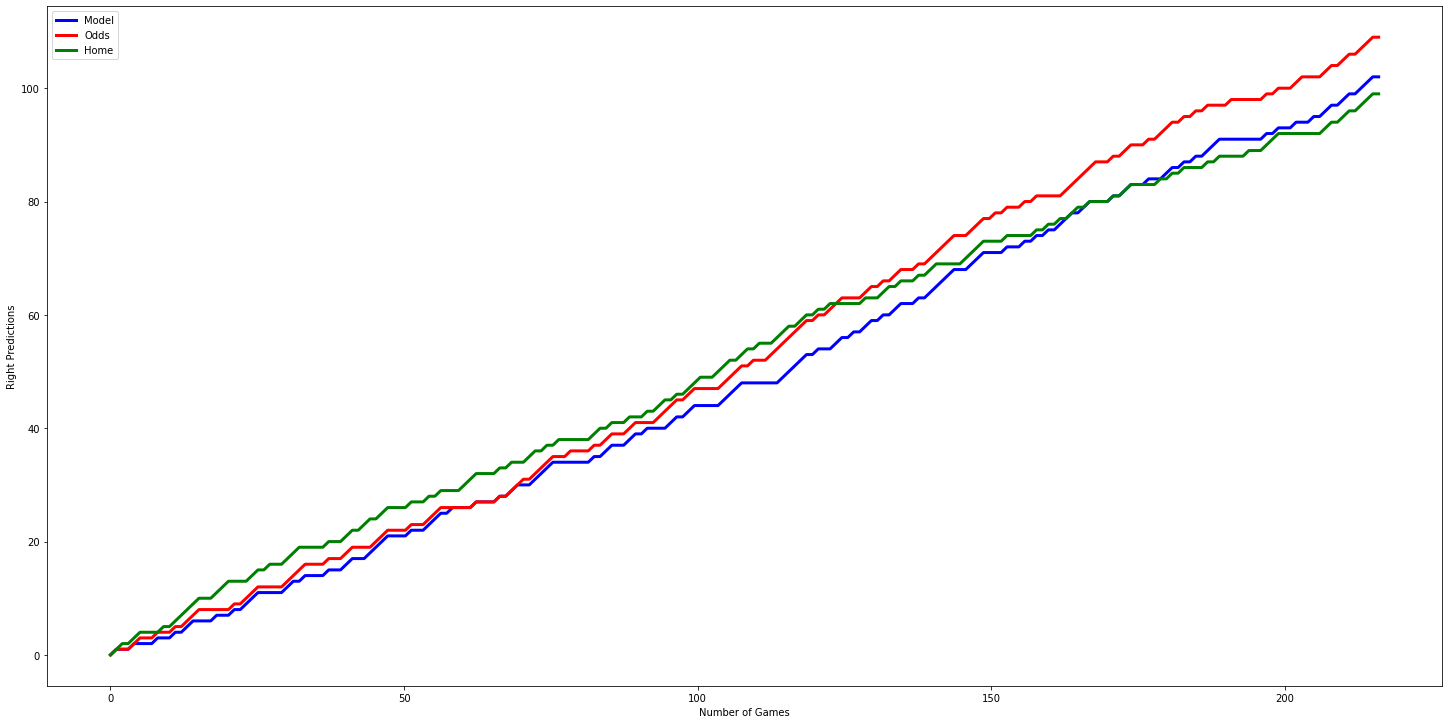

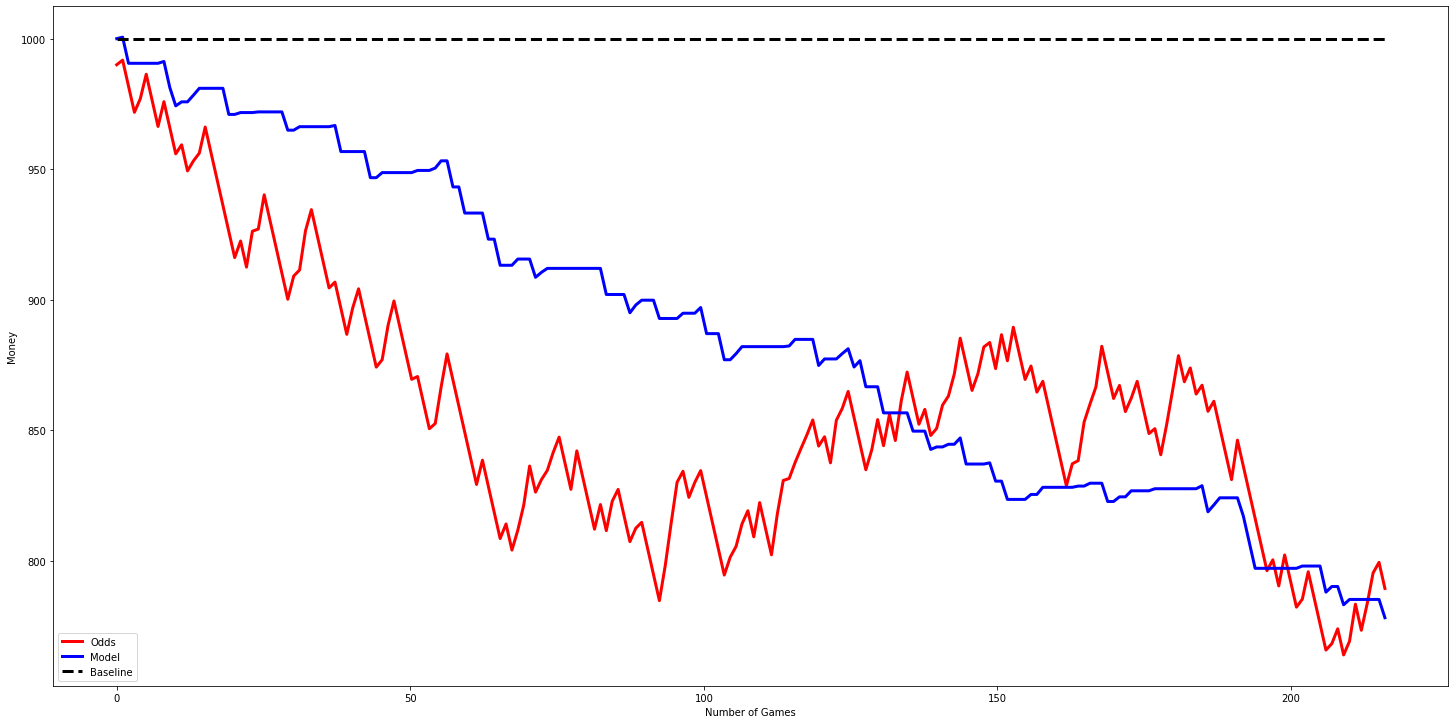

In [27]:
file1 = 'match_data_bl_wo_nan_s_2022.csv'
file2 = 'dataframe_with_odd_predictions_v2.csv'
run_all(file1, file2)